# This Notebook aims to Analyse the Vaccination Drives among the Countries


## 1. DATA PREPARATION AND CLEANING


In [264]:
import pandas as pd
import numpy as np

In [240]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


In [241]:
df.shape

(43341, 15)

This dataset contains 43341 rows and 15 columns. Now we shall check whether it has any null values in it.

In [242]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     19633
people_vaccinated                      20724
people_fully_vaccinated                23637
daily_vaccinations_raw                 23890
daily_vaccinations                       237
total_vaccinations_per_hundred         19633
people_vaccinated_per_hundred          20724
people_fully_vaccinated_per_hundred    23637
daily_vaccinations_per_million           237
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

There are many null values since it involves daily vaccinations as well. Let's fill all the null values as 0.

In [243]:
df.fillna(value = 0 , inplace = True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43341 entries, 0 to 43340
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              43341 non-null  object 
 1   iso_code                             43341 non-null  object 
 2   date                                 43341 non-null  object 
 3   total_vaccinations                   43341 non-null  float64
 4   people_vaccinated                    43341 non-null  float64
 5   people_fully_vaccinated              43341 non-null  float64
 6   daily_vaccinations_raw               43341 non-null  float64
 7   daily_vaccinations                   43341 non-null  float64
 8   total_vaccinations_per_hundred       43341 non-null  float64
 9   people_vaccinated_per_hundred        43341 non-null  float64
 10  people_fully_vaccinated_per_hundred  43341 non-null  float64
 11  daily_vaccinations_per_milli

Above we saw the Date columnn as object datatype which needs to be changed in order to get proper insights. 

In [245]:
df.date = pd.to_datetime(df.date)

The next function describes the whole dataset.

In [246]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.334100e+04,4.334100e+04,4.334100e+04,4.334100e+04,4.334100e+04,43341.000000,43341.000000,43341.000000,43341.000000
mean,1.037221e+07,4.261525e+06,2.308884e+06,1.162832e+05,1.290577e+05,22.670311,13.202436,8.378495,3564.236335
std,8.106183e+07,2.293198e+07,1.316195e+07,8.999806e+05,8.835764e+05,38.199032,21.371767,16.633659,4484.976788
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.210000e+02,0.000000,0.000000,0.000000,491.000000
50%,2.943100e+04,8.772000e+03,0.000000e+00,0.000000e+00,6.690000e+03,0.760000,0.190000,0.000000,2182.000000
75%,1.823403e+06,1.061257e+06,4.180640e+05,1.782400e+04,4.061200e+04,29.770000,18.680000,7.540000,5358.000000
max,2.124582e+09,1.095000e+09,9.697200e+08,2.474100e+07,2.242429e+07,234.560000,118.000000,116.560000,117497.000000


In [247]:
df['country'].nunique()

222

There are Total of 222 countries included in this Dataframe

## 2 .  Exploratory Data Analysis

Now we will import the libraries we need for Data Visualization

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


## The below graph shows the Daily Vaccination rate around the World.

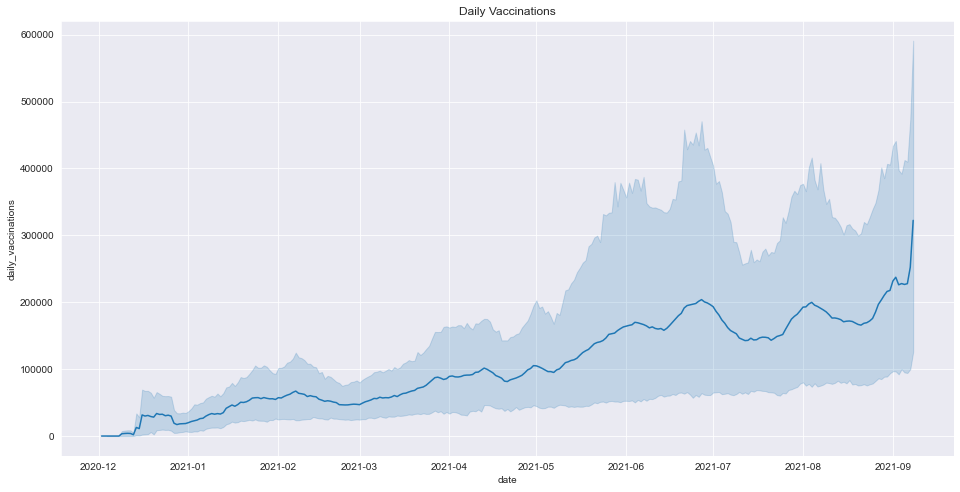

In [249]:
plt.figure(figsize = (16,8));
plt.title('Daily Vaccinations');
sns.lineplot(x = df['date'] , y = df['daily_vaccinations']);

##  Rate of Vaccination in Top Countries in terms of Total Vaccinations

In [250]:
countries = df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index
top_5 = pd.DataFrame(columns = df.columns)
for country in countries:
    top_5 = top_5.append(df[df['country'] == country])

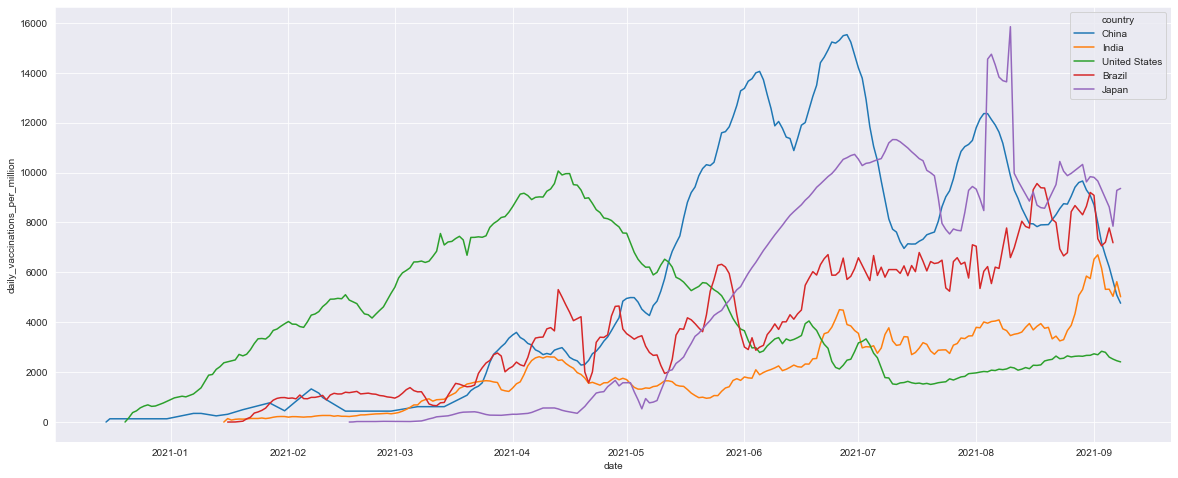

In [251]:
plt.figure(figsize=(20,8));
sns.lineplot(x = top_5['date'] , y = top_5['daily_vaccinations_per_million'] , hue = top_5['country']);

In [252]:
fully_vac = df.groupby('country')['people_fully_vaccinated'].max().sort_values(ascending = False)[:10]
fully_vac.reset_index()

,country,people_fully_vaccinated
0,China,969720000.0
1,United States,177104652.0
2,India,167088377.0
3,Brazil,67383668.0
4,Japan,62546331.0
5,Germany,51329215.0
6,United Kingdom,43620946.0
7,France,41836746.0
8,Indonesia,39721571.0
9,Turkey,39298396.0


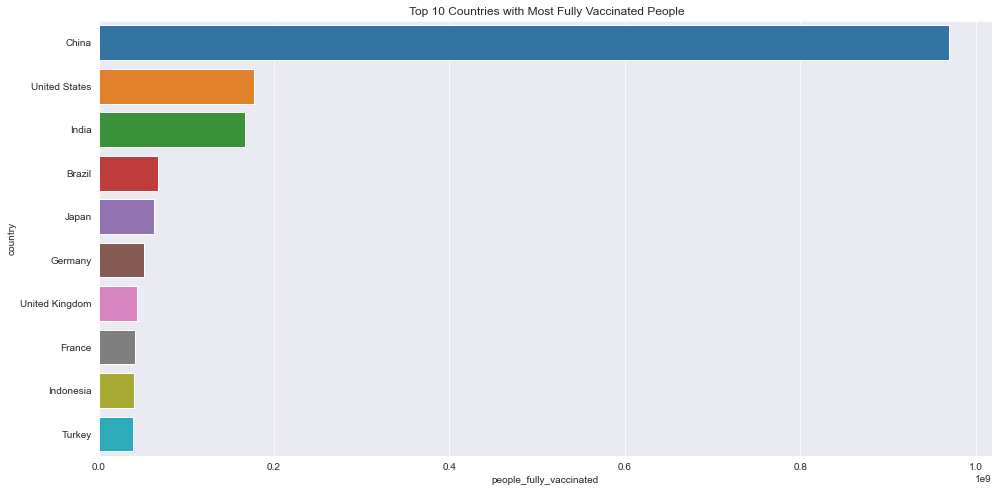

In [253]:
plt.figure(figsize = (16,8));
sns.barplot(x = fully_vac , y = fully_vac.index);
plt.title(' Top 10 Countries with Most Fully Vaccinated People');

##  Rate of Vaccination in India

In [254]:
india = df[df['country'] == 'India']

In [255]:
india.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
17701,India,IND,2021-01-25,2023809.0,2023809.0,0.0,408305.0,224251.0,0.15,0.15,0.00,161.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
17793,India,IND,2021-04-27,144879233.0,121263287.0,23615946.0,2354286.0,2355946.0,10.40,8.70,1.69,1691.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
17841,India,IND,2021-06-14,252760364.0,205571046.0,47189318.0,3329948.0,3181387.0,18.14,14.75,3.39,2283.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
17811,India,IND,2021-05-15,181544536.0,141132112.0,40412424.0,1898123.0,2007240.0,13.03,10.13,2.90,1441.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
17884,India,IND,2021-07-27,446156659.0,349324061.0,96832598.0,4244264.0,4383458.0,32.02,25.07,6.95,3146.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/


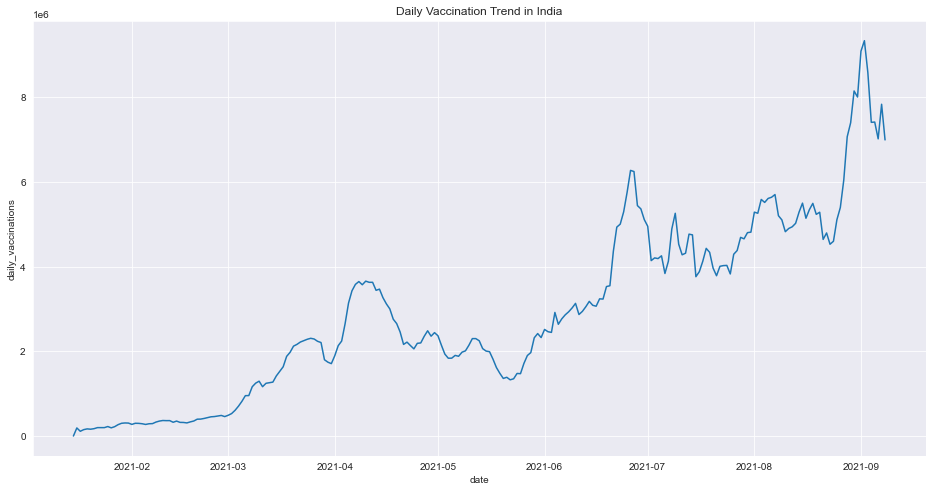

In [256]:
plt.figure(figsize = (16,8));
plt.title('Daily Vaccination Trend in India')
sns.lineplot(x = india['date'] , y = india['daily_vaccinations']);

In [257]:
ind_vac = india['people_vaccinated'].max()/1000000
print('{0:.2f} M people have taken at least a single dose in India.' .format(ind_vac))
fully_ind_vac = india['people_fully_vaccinated'].max()/1000000
print('{0:.2f} M people have taken both the doses in India.' .format(fully_ind_vac))

543.46 M people have taken at least a single dose in India.
167.09 M people have taken both the doses in India.


In [258]:
pct = (fully_ind_vac / ind_vac ) * 100
print('{0:.2f} % of people who took at least a single dose are fully vaccinated.'.format(pct))

30.75 % of people who took at least a single dose are fully vaccinated.


## Countries with Most People Vaccinated per 100

In [259]:
fully_vac_100 = df.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False)[:10]
fully_vac_100.reset_index()

,country,people_fully_vaccinated_per_hundred
0,Gibraltar,116.56
1,Pitcairn,100.00
2,Malta,80.52
3,Portugal,78.75
4,United Arab Emirates,77.11
5,Iceland,77.07
6,Singapore,76.51
7,Cayman Islands,75.14
8,Qatar,75.13
9,Spain,74.32


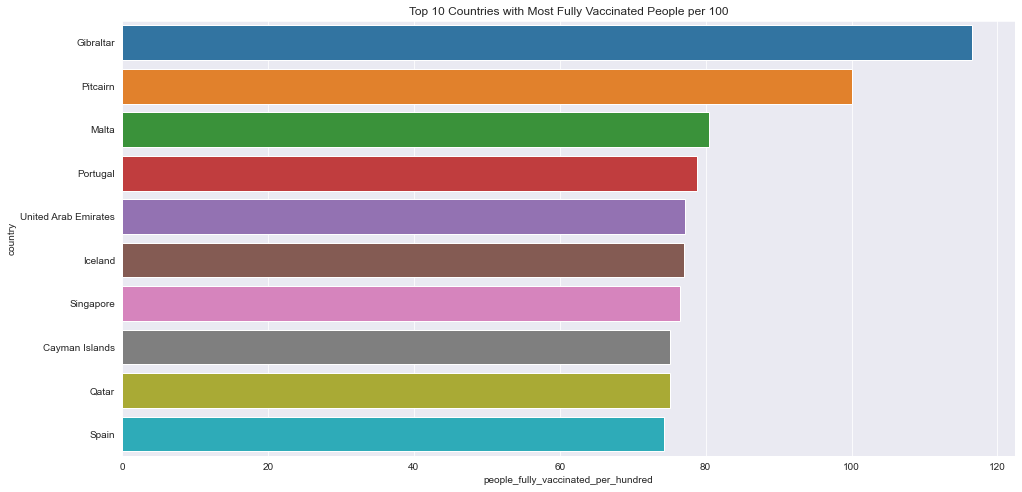

In [260]:
plt.figure(figsize = (16,8));
sns.barplot(x = fully_vac_100 , y = fully_vac_100.index);
plt.title('Top 10 Countries with Most Fully Vaccinated People per 100');

## Popular Vaccines Around the World

In [261]:
vaccine = df['vaccines'].value_counts()[:10]
vaccine

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        5449
Oxford/AstraZeneca                                                   4935
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         3809
Oxford/AstraZeneca, Sinopharm/Beijing                                2884
Oxford/AstraZeneca, Pfizer/BioNTech                                  2874
Moderna, Pfizer/BioNTech                                             1859
Pfizer/BioNTech                                                      1556
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V    1542
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                          840
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                837
Name: vaccines, dtype: int64

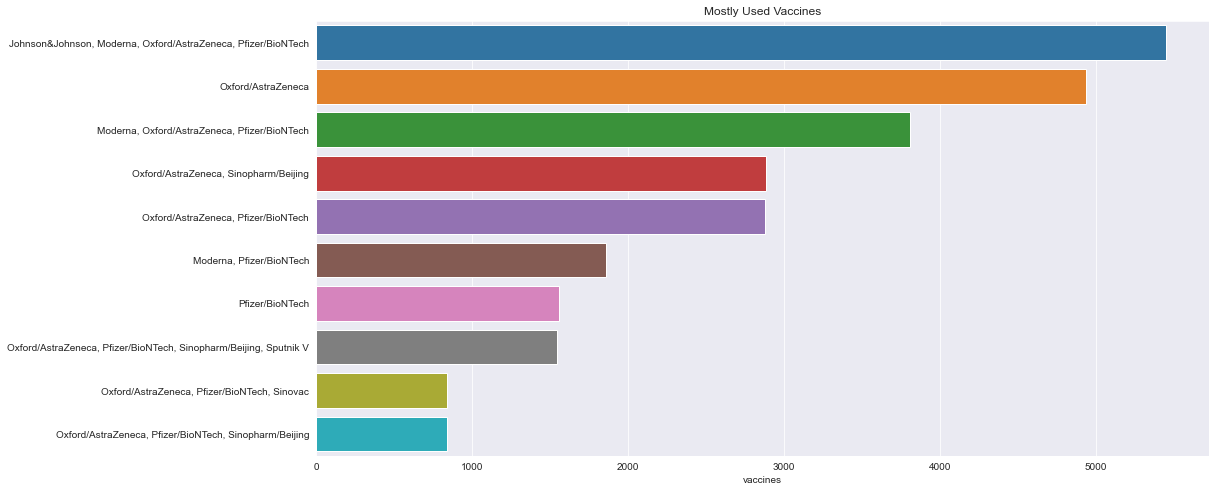

In [262]:
plt.figure(figsize = (16,8));
sns.barplot(y = vaccine.index , x = vaccine );
plt.title("Mostly Used Vaccines");


In [263]:
vac_country = df.groupby('vaccines')['country'].unique()
vac_country = pd.DataFrame(vac_country).reset_index()
vac_country.sample(15)

,vaccines,country
48,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[North Macedonia]
55,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",[Algeria]
51,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...","[Albania, Bosnia and Herzegovina, Oman]"
40,"Moderna, Oxford/AstraZeneca, Sinovac",[Tajikistan]
36,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...","[Sri Lanka, Vietnam]"
24,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...","[Bolivia, Moldova]"
41,"Moderna, Pfizer/BioNTech","[Bonaire Sint Eustatius and Saba, Curacao, Fae..."
46,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[United Arab Emirates]
11,"EpiVacCorona, Sputnik V",[Russia]
53,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac",[Myanmar]
